In [1]:
'''This is a prediction analysis on if a patient will have a heart attack or not
given the dataset'''

'''heart attack dataset details
1.)age=age in years
2.)sex=sex(0 = female, 1 = male)
3.)cp=chestpain type(1=typical angina,2=atypical angina,3=non-anginal pain,0=asymptomatic)
4.)trtbps=resting blood pressure(in mm Hg on admission to the hospiatal)
5.)chol=esrum cholestoral in mg/dl
6.)fbs=fasting blood sugar > 120 mg/dl (0=false, 1=true)
7.)restecg=resting electrocardiographic results(0=normal,1=hypertrophy,2=having ST-T abnorm)
8.)thalachh=maximum heart rate achieved
9.)exng=exercise induced angina(0 = no, 1 = yes)
10.)oldpeak=ST depression induced by exercise relative to rest
11.)slp=the slope of the peak exercise ST segment(0=downsloping, 1=flat, 2=upsloping)
12.)caa=number of major vessels (0-4) colored by flourosopy
13.)thall=thallium stress test(1=fixed defect, 2=reversable defect, 3=normal)
14.)output= 0=less chance of heart attack, 1=more chance of heart attack '''

'heart attack dataset details\n1.)age=age in years\n2.)sex=sex(0 = female, 1 = male)\n3.)cp=chestpain type(1=typical angina,2=atypical angina,3=non-anginal pain,0=asymptomatic)\n4.)trtbps=resting blood pressure(in mm Hg on admission to the hospiatal)\n5.)chol=esrum cholestoral in mg/dl\n6.)fbs=fasting blood sugar > 120 mg/dl (0=false, 1=true)\n7.)restecg=resting electrocardiographic results(0=normal,1=hypertrophy,2=having ST-T abnorm)\n8.)thalachh=maximum heart rate achieved\n9.)exng=exercise induced angina(0 = no, 1 = yes)\n10.)oldpeak=ST depression induced by exercise relative to rest\n11.)slp=the slope of the peak exercise ST segment(0=downsloping, 1=flat, 2=upsloping)\n12.)caa=number of major vessels (0-4) colored by flourosopy\n13.)thall=thallium stress test(1=fixed defect, 2=reversable defect, 3=normal)\n14.)output= 0=less chance of heart attack, 1=more chance of heart attack '

In [2]:
'''import the necessary libraries'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier



In [3]:
#import the heart csv dataset -> analyze the top 5 rows
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#check some info about the dataset
df.info()

#we can see there are 303 patients(rows) and the types of each column
#13 features in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#check for missing values in the dataset
#we expect either a true or a false
df.isna().any().any()

#the result was false so we are not missing any data

False

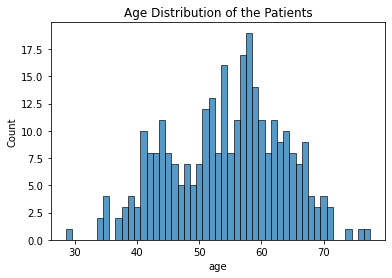

In [6]:
'''Now we need to take a closer look and analyze the columns'''

#first let's analyze the age column
sns.histplot(df.age, discrete=True)
plt.title('Age Distribution of the Patients')
plt.show()

#we can see that most patients are above 40 years old and normal distribution
#the peak is at about 57/58 years old

,sex
1,207
0,96


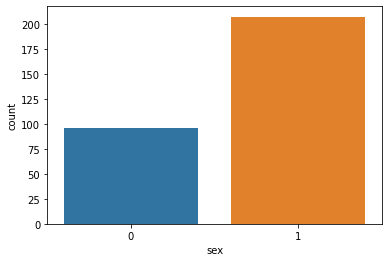

In [7]:
#next analyze the gender column
sns.countplot(x ='sex', data = df) #this plots a countplot for the df for sex column
df.sex.value_counts().to_frame() #shows the numerical values

#from this we can see there are more males than females

,cp
0,143
2,87
1,50
3,23


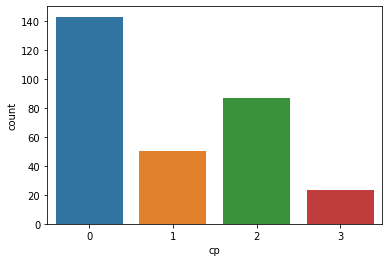

In [8]:
#analyze the chest pain type => 4 different types of pain
sns.countplot(x ='cp', data = df) #another countplot for chest pain since it's categorical
df.cp.value_counts().to_frame()

#we can see the most types of chest pain is 0 -> asymptomatic 
#this could possibly correlate with age

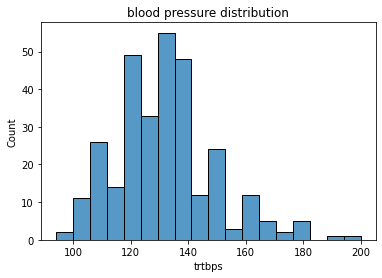

In [9]:
#analyze resting blood pressure
sns.histplot(df.trtbps)
plt.title("blood pressure distribution")
plt.show()

#roughly normal distribution 
#peak blood pressure is around 130/135 

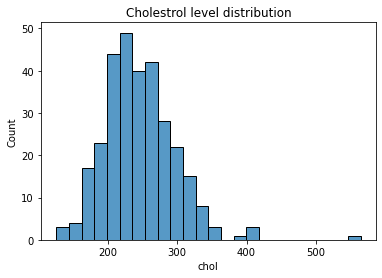

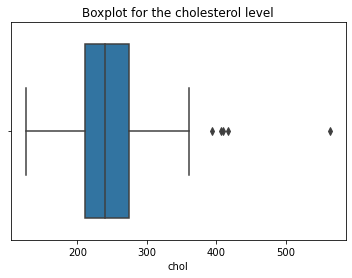

In [10]:
#analyze cholestrol variable
sns.histplot(df.chol)
plt.title('Cholestrol level distribution')
plt.show()

#the distribution has a roughly normal shape
#skewed to the right with the outlier at 600
#lets use a boxlot to see it

sns.boxplot(data=df, x='chol')
plt.title('Boxplot for the cholesterol level')
plt.show()
#Yes, the cholesterol is higher than approx. 360 can be considered 
#as outliers. But we can not delete them, because it's realistic values.

,fbs
0,258
1,45


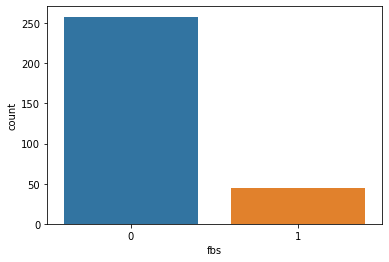

In [11]:
#Analyze Fasting Blood Sugar
#0 means < 120, 1 mean > 120
sns.countplot(x ='fbs', data = df) #this plots a countplot for the df for sex column
df.fbs.value_counts().to_frame() #shows the numerical values

#from this we can see that a majority of the patients do not have serious sugar problems

,restecg
1,152
0,147
2,4


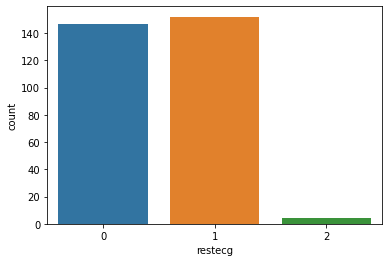

In [12]:
#analyze ECG column
#resting electrocardiographic results(0=normal,1=hypertrophy,2=having ST-T abnorm)
sns.countplot(x ='restecg', data = df) #another countplot for chest pain since it's categorical
df.restecg.value_counts().to_frame()

#we can see that most patients have hypertrophy and a few abnormals

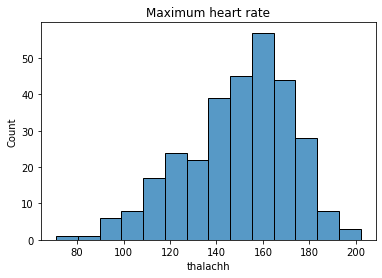

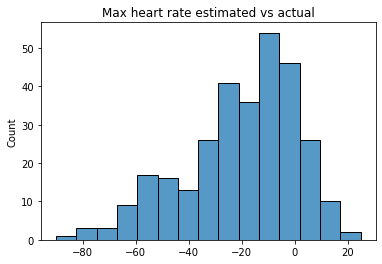

In [14]:
#thalachh=maximum heart rate achieved
#Analyze maximum heart rate achieved
sns.histplot(df.thalachh)
plt.title('Maximum heart rate')
plt.show()
#the graph seems to be roughly normal with a slight skew left

#MHR can be estimated with this equation => MHR = 208-(0.7 x age)

#lets look at how many patients have their maximum heart rate achived is higher than estimated
sns.histplot(df.thalachh - (208 - (0.7 * df.age)))
plt.title('Max heart rate estimated vs actual')
plt.show()
#from this graph we can see that most patients have a lower MHR than estimated

,exng
0,204
1,99


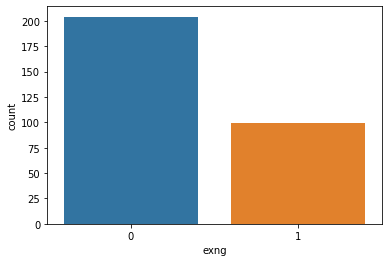

In [17]:
#exng=exercise induced angina(0 = no, 1 = yes)
#Analyze exercise induced angina

sns.countplot(x ='exng', data = df) #another countplot for chest pain since it's categorical
df.exng.value_counts().to_frame()

#more than half of patients do not have exercise induced angina(chest pain)

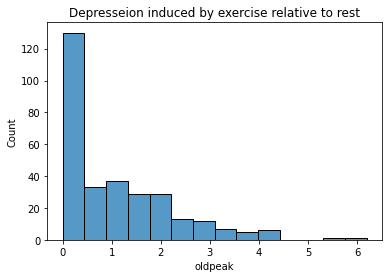

In [19]:
#oldpeak=ST depression induced by exercise relative to rest
#Analyze oldpeak 
sns.histplot(df.oldpeak)
plt.title('Depresseion induced by exercise relative to rest')
plt.show()

#narrow peak at 0 and distribution skewed to the right

,slp
2,142
1,140
0,21


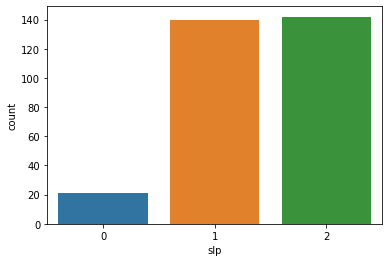

In [20]:
#slp=the slope of the peak exercise ST segment(0=downsloping, 1=flat, 2=upsloping)
#Analyze the slope
sns.countplot(x ='slp', data = df) #another countplot for chest pain since it's categorical
df.slp.value_counts().to_frame()

#about half and half of patients either have a flat slope or upsloping
#small number of patients downsloping

,caa
0,175
1,65
2,38
3,20
4,5


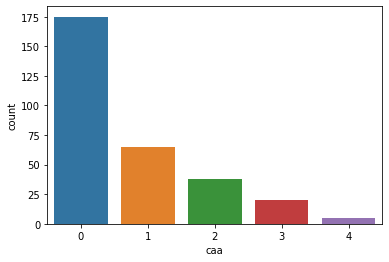

In [23]:
#caa=number of major vessels (0-4) colored by flourosopy
#Analyze the number of major vessels
sns.countplot(x ='caa', data = df) #another countplot for chest pain since it's categorical
df.caa.value_counts().to_frame()

#more than half the patients do not have major vessels

,thall
2,166
3,117
1,18
0,2


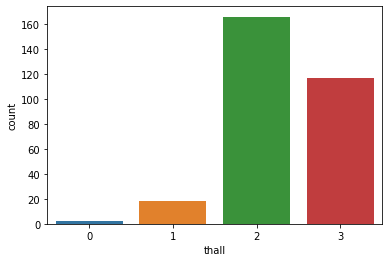

In [24]:
#thall=thallium stress test(1=fixed defect, 2=reversable defect, 3=normal)
#Analyze the stress numbers
sns.countplot(x ='thall', data = df) #another countplot for chest pain since it's categorical
df.thall.value_counts().to_frame()
